In [1]:
from skymap import io, Calibrator, plot_utils
import numpy as np 
import matplotlib.pyplot as plt
import h5py
from pathlib import Path

import astropy.units as u


In [2]:


datadir : Path = "/Users/akshatha.vydula/packages_310/skymap/data_310/TGBT25B_614_01"

cal_file = datadir + "/310" + "/cal_file_2025_11_16.hdf5"

data_file = datadir + "/310" + "/GBTOBS_2026-01-16T112750.hdf5"

print(cal_file)

obs_data = io.read_obs_hdf5(data_file)
cal_data = io.read_cal_hdf5(cal_file)

print(f" Calibration File loaded: {cal_file}")
print(f" Data File loaded: {data_file}")


/Users/akshatha.vydula/packages_310/skymap/data_310/TGBT25B_614_01/310/cal_file_2025_11_16.hdf5
 Calibration File loaded: /Users/akshatha.vydula/packages_310/skymap/data_310/TGBT25B_614_01/310/cal_file_2025_11_16.hdf5
 Data File loaded: /Users/akshatha.vydula/packages_310/skymap/data_310/TGBT25B_614_01/310/GBTOBS_2026-01-16T112750.hdf5


In [3]:
f = h5py.File(data_file, 'r')

print(f['data']['spec'].shape)

(86400, 10, 256)


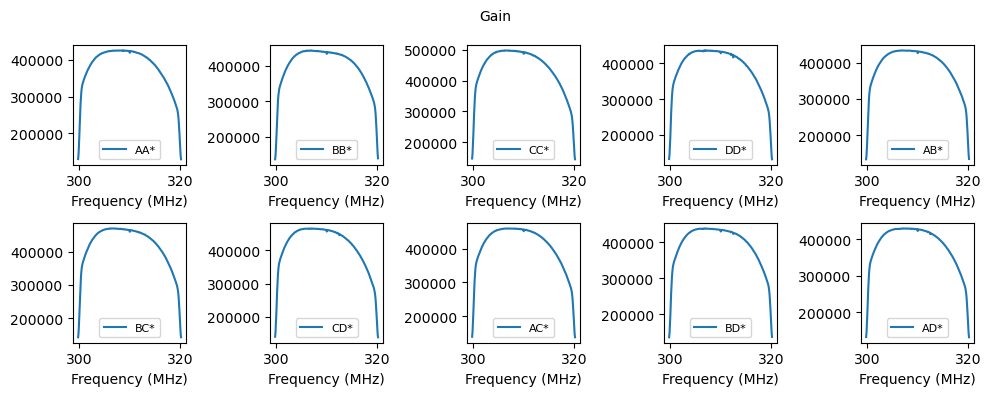

In [4]:
plot_utils.plot_cal_data(cal_data)

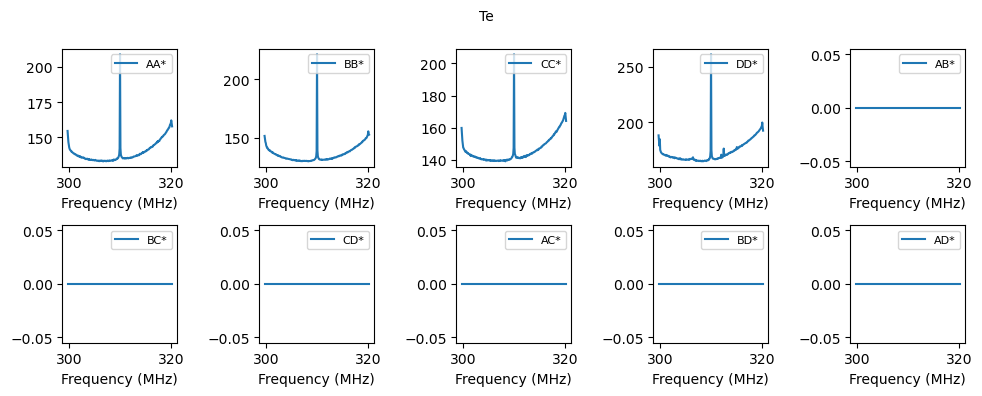

In [5]:
plot_utils.plot_cal_data(cal_data, attribute='te')

In [6]:
#plot_.plot_waterwall(obs_data)

In [7]:
#plot_utils.plot_waterwall(obs_data, data_type="magnitude", attribute="AA_");utils.plot_waterwall(obs_data, data_type="magnitude", attribute="AB_")


In [8]:
spec_cal = Calibrator.lab_cal(obs_data, cal_data)

In [9]:
beam_slice = slice(60000,None)
beam_obs = io.get_slice_from_time(spec_cal, beam_slice)

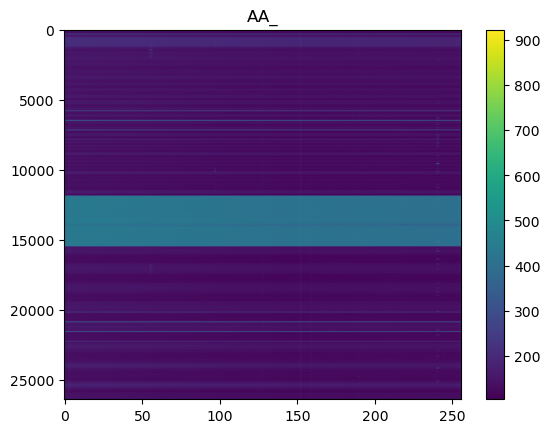

In [10]:
plt.imshow(np.abs(beam_obs.calibrated_spec.AA_).value, aspect='auto')
plt.colorbar()
plt.title("AA_")
plt.show()

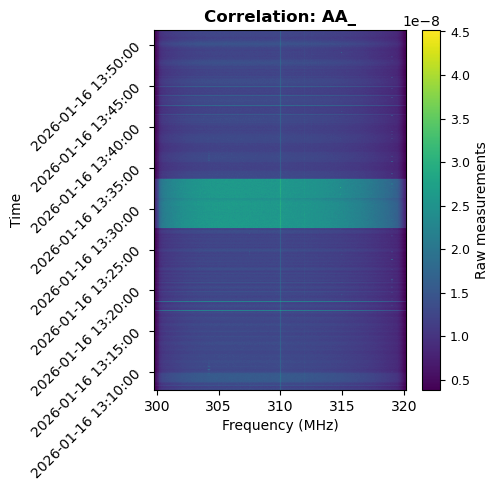

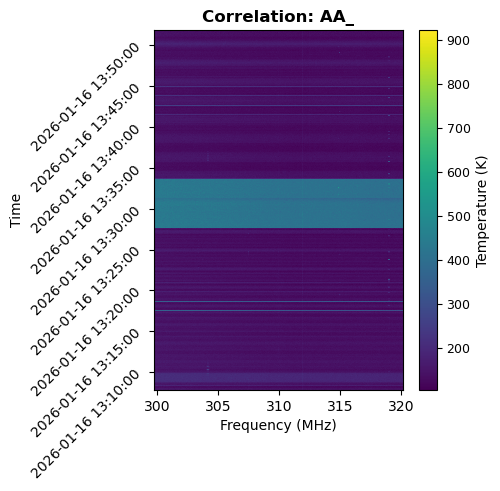

In [11]:
plot_utils.plot_waterwall(beam_obs, data_type="magnitude", attribute="AA_");
plot_utils.plot_waterwall(beam_obs, data_type="magnitude", attribute="AA_", calibrated=True);

In [12]:
with h5py.File(data_file, 'r') as f:
    dset = f['data']['spec']
    print(list(f['data'].keys()), f['diag'], f['hdr'])
    print("shape:", dset.shape)
    print("dtype:", dset.dtype)
    print("chunks:", dset.chunks)
    print("compression:", dset.compression)

['freq', 'id', 'spec', 'time'] <HDF5 group "/diag" (9 members)> <HDF5 group "/hdr" (0 members)>
shape: (86400, 10, 256)
dtype: complex64
chunks: (64, 2, 32)
compression: None


In [13]:
test = io.get_slice_from_time(obs_data, beam_slice)

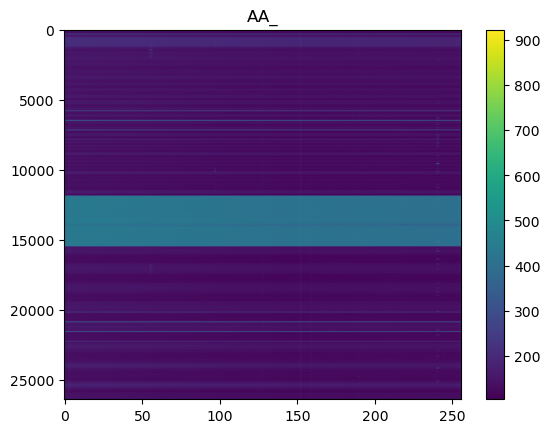

In [14]:
plt.imshow(Calibrator.get_Tsys_lab(test.spec.AA_*u.V**2, cal_data.gain.AA_).value.real - cal_data.te.AA_, aspect='auto')
plt.colorbar()
plt.title("AA_")
plt.show()